In [42]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression,LinearRegression,Lasso,ElasticNet,ridge_regression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import seaborn as sns
%matplotlib inline

In [8]:
df1 = pd.read_excel('new data.xlsx')

In [11]:
train = pd.read_excel('train.xlsx')
test = pd.read_excel('test.xlsx')


In [9]:

ht1=df1.corr()

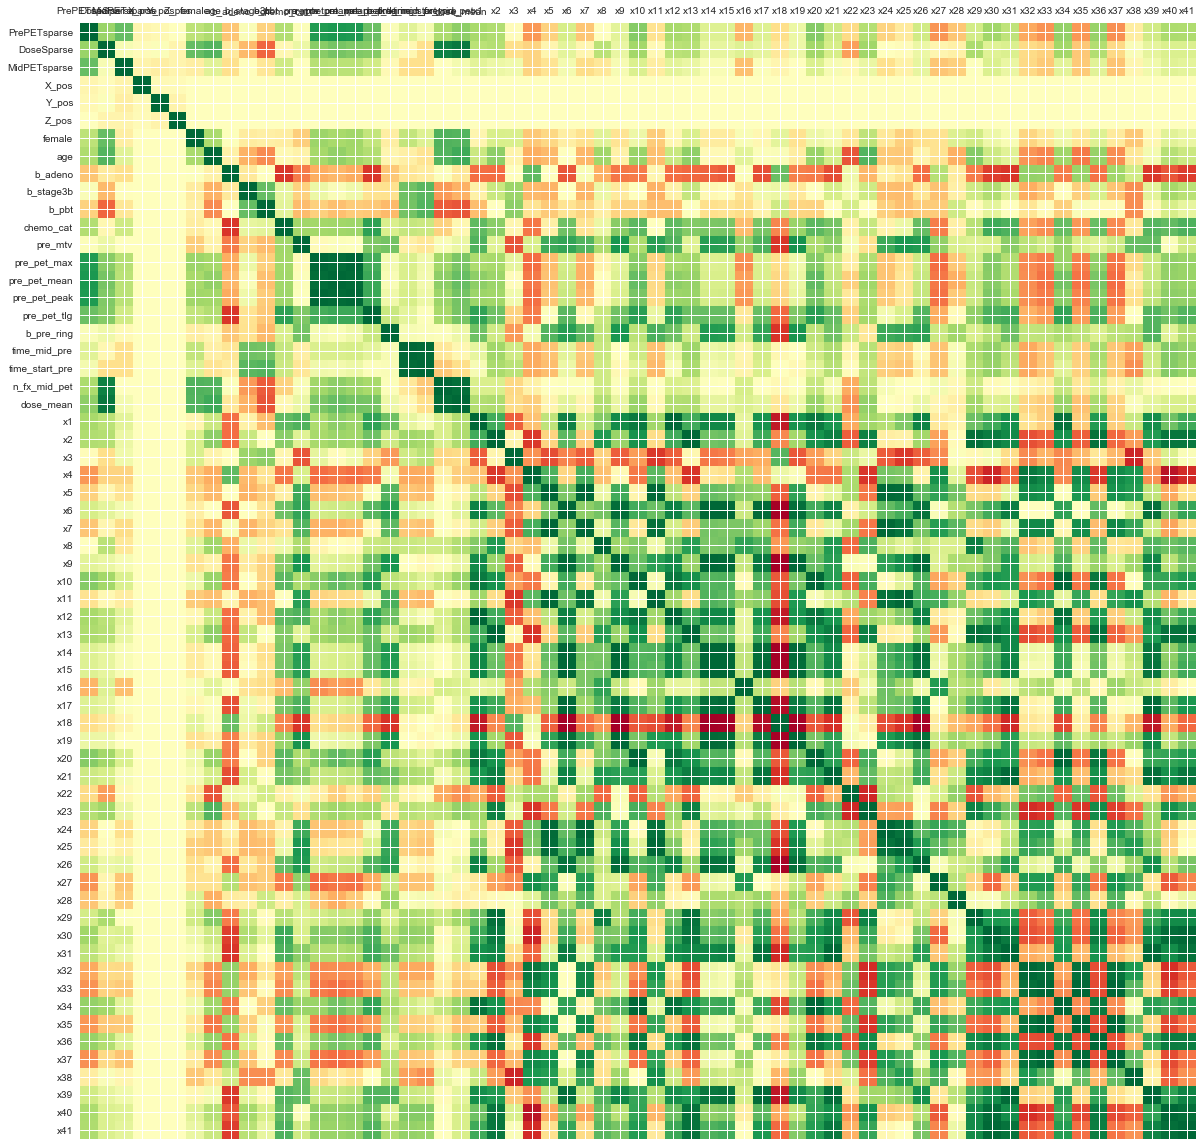

In [22]:
#plt.matshow(ht)
labs=[c for c in ht.columns]

fig=plt.figure(figsize=(20,30))
ax=fig.add_subplot(111)
ax.matshow(ht,cmap=plt.cm.RdYlGn)
ax.set_xticks(np.arange(len(labs)))
ax.set_yticks(np.arange(len(labs)))
ax.set_xticklabels(labs)
ax.set_yticklabels(labs)
plt.show()

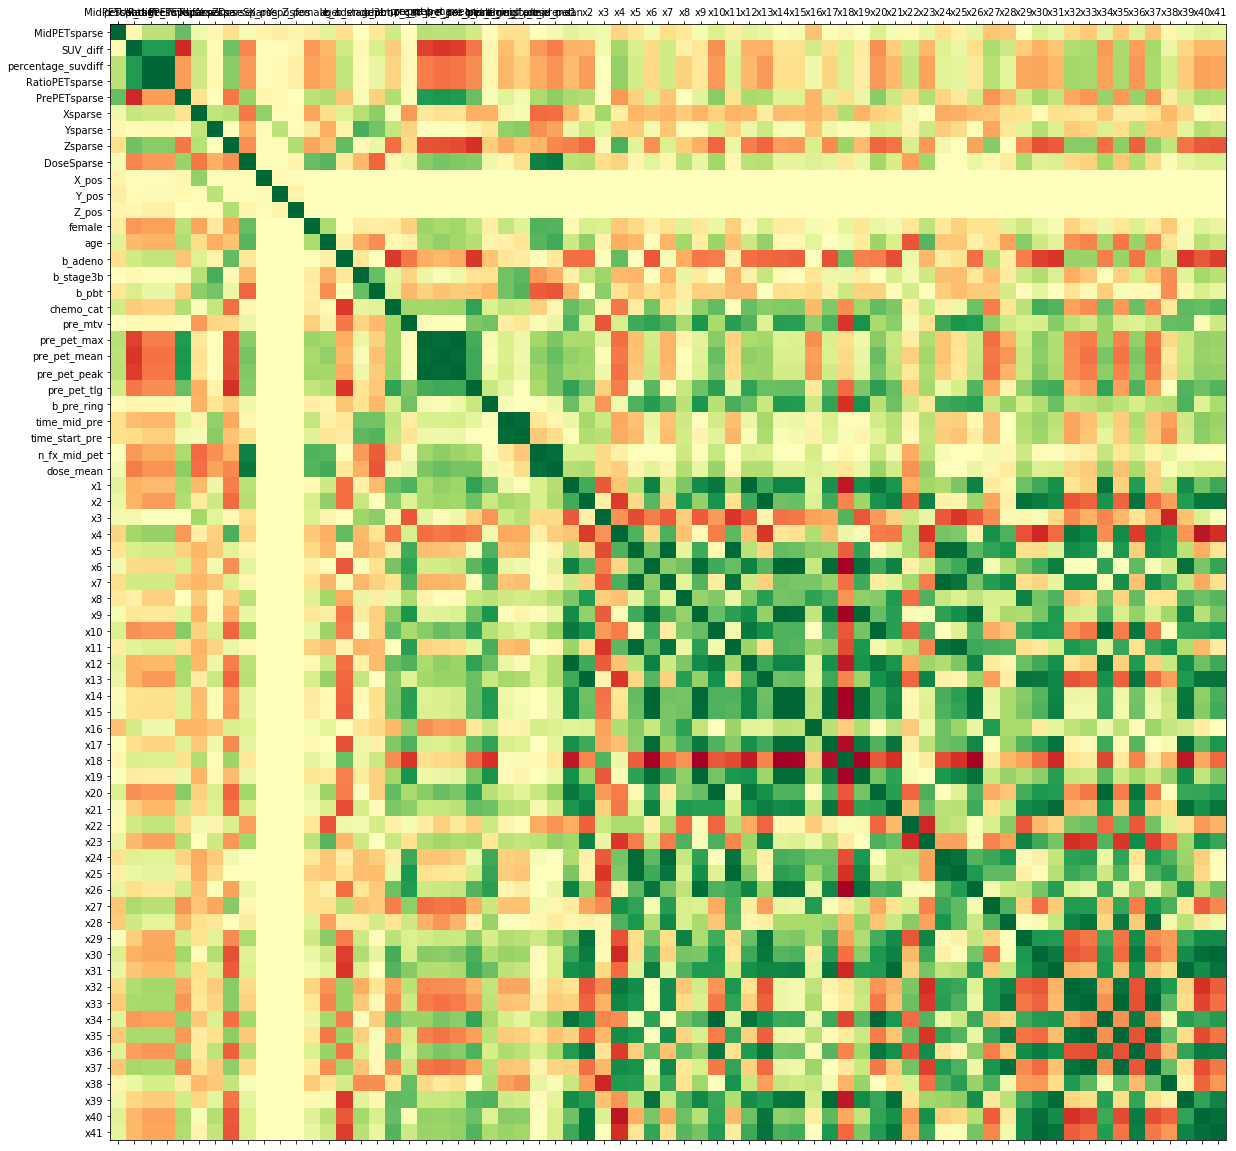

In [10]:
labs=[c for c in ht1.columns]

fig=plt.figure(figsize=(20,30))
ax=fig.add_subplot(111)
ax.matshow(ht1,cmap=plt.cm.RdYlGn)
ax.set_xticks(np.arange(len(labs)))
ax.set_yticks(np.arange(len(labs)))
ax.set_xticklabels(labs)
ax.set_yticklabels(labs)
plt.show()

In [6]:
df1.head()

,PrePETsparse,DoseSparse,MidPETsparse,SUV_diff,percentage_suvdiff,X_pos,Y_pos,Z_pos,female,age,...,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41
0,2.280547,24.838322,2.176542,-0.104005,-4.560511,0.502114,-0.261964,-1.146492,0,58,...,304.958288,0.020609,714.47764,0.003917,245.640281,88.30364,177567.5576,2.007114,5.451473,0.114835
1,2.204343,24.722164,2.070369,-0.133973,-6.077698,0.542930,-0.261964,-1.146492,0,58,...,304.958288,0.020609,714.47764,0.003917,245.640281,88.30364,177567.5576,2.007114,5.451473,0.114835
2,2.107694,24.610783,1.934999,-0.172695,-8.193529,0.583746,-0.261964,-1.146492,0,58,...,304.958288,0.020609,714.47764,0.003917,245.640281,88.30364,177567.5576,2.007114,5.451473,0.114835
3,1.953427,24.550318,1.722654,-0.230773,-11.813762,0.624563,-0.261964,-1.146492,0,58,...,304.958288,0.020609,714.47764,0.003917,245.640281,88.30364,177567.5576,2.007114,5.451473,0.114835
4,1.797301,24.594870,1.510308,-0.286993,-15.968017,0.665379,-0.261964,-1.146492,0,58,...,304.958288,0.020609,714.47764,0.003917,245.640281,88.30364,177567.5576,2.007114,5.451473,0.114835


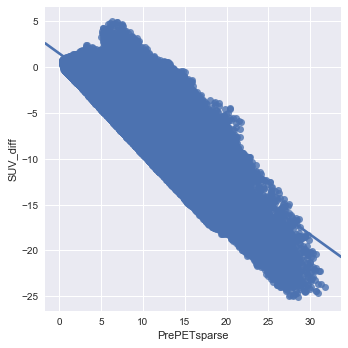

In [33]:
sns.lmplot(x='PrePETsparse',y='SUV_diff',data=df1)

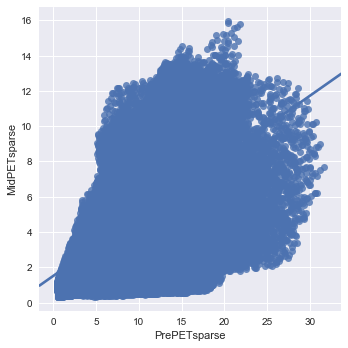

In [34]:
sns.lmplot(x='PrePETsparse',y='MidPETsparse',data=df1)

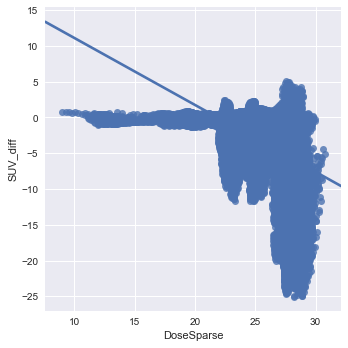

In [36]:
sns.lmplot(x='DoseSparse',y='SUV_diff',data=df1)

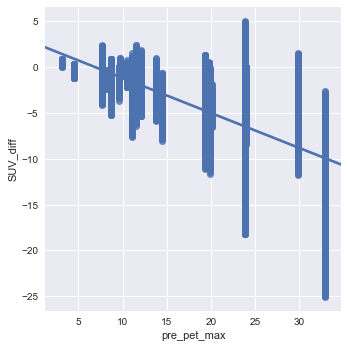

In [37]:
sns.lmplot(x='pre_pet_max',y='SUV_diff',data=df1)

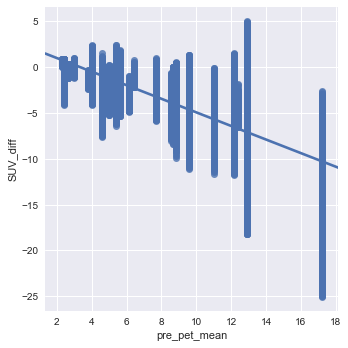

In [38]:
sns.lmplot(x='pre_pet_mean',y='SUV_diff',data=df1)

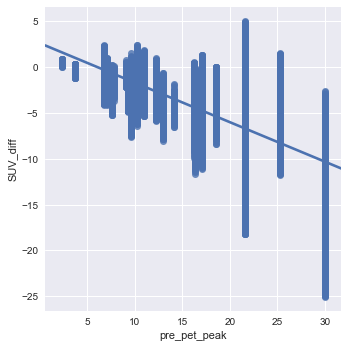

In [39]:
sns.lmplot(x='pre_pet_peak',y='SUV_diff',data=df1)

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256010 entries, 0 to 256009
Data columns (total 66 columns):
Xsparse           256010 non-null int64
Ysparse           256010 non-null int64
Zsparse           256010 non-null int64
PrePETsparse      256010 non-null float64
DoseSparse        256010 non-null float64
X_pos             256010 non-null float64
Y_pos             256010 non-null float64
Z_pos             256010 non-null float64
female            256010 non-null int64
age               256010 non-null int64
b_adeno           256010 non-null int64
b_stage3b         256010 non-null int64
b_pbt             256010 non-null int64
chemo_cat         256010 non-null int64
pre_mtv           256010 non-null float64
pre_pet_max       256010 non-null float64
pre_pet_mean      256010 non-null float64
pre_pet_peak      256010 non-null float64
pre_pet_tlg       256010 non-null float64
b_pre_ring        256010 non-null int64
time_mid_pre      256010 non-null int64
time_start_pre    256010 non-

In [41]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796 entries, 0 to 795
Data columns (total 66 columns):
Xsparse           796 non-null int64
Ysparse           796 non-null int64
Zsparse           796 non-null int64
PrePETsparse      796 non-null float64
DoseSparse        796 non-null float64
X_pos             796 non-null float64
Y_pos             796 non-null float64
Z_pos             796 non-null float64
female            796 non-null int64
age               796 non-null int64
b_adeno           796 non-null int64
b_stage3b         796 non-null int64
b_pbt             796 non-null int64
chemo_cat         796 non-null int64
pre_mtv           796 non-null float64
pre_pet_max       796 non-null float64
pre_pet_mean      796 non-null float64
pre_pet_peak      796 non-null float64
pre_pet_tlg       796 non-null float64
b_pre_ring        796 non-null int64
time_mid_pre      796 non-null int64
time_start_pre    796 non-null int64
n_fx_mid_pet      796 non-null int64
dose_mean         796 no

Rsquare value: 0.7298772249355401
mse: 0.5468160102312409
mae: 0.5663552995342772


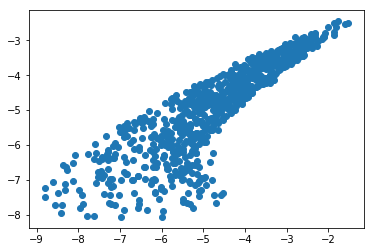

In [22]:
X_train=train.drop(['SUV_diff'],axis=1)
X_test = test.drop(['SUV_diff'],axis=1)
y_train=train['SUV_diff']
y_test=test['SUV_diff']

ln = LinearRegression()
ln.fit(X_train,y_train)
pred = ln.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
sc_ore = r2_score(y_test,pred)
mse1 = mean_squared_error(y_test,pred)
mae = mean_absolute_error(y_test,pred)
print('Rsquare value:',sc_ore)
print('mse:',mse1)
print('mae:',mae)
plt.scatter(y_test,pred)

0.7515914747805754
Rsquare value: 0.7515914747805754
mse: 0.5028593336326348
mae: 0.5242382949465832


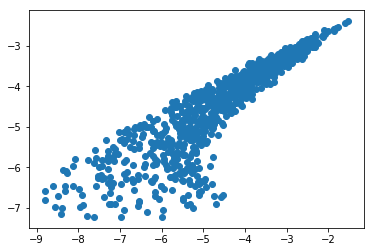

In [24]:
X_train=train.drop(['SUV_diff'],axis=1)
X_test = test.drop(['SUV_diff'],axis=1)
y_train=train['SUV_diff']
y_test=test['SUV_diff']

la=Lasso(alpha=1,max_iter=20000)
la.fit(X_train,y_train)
pred11 = la.predict(X_test)
from sklearn.metrics import r2_score
sc_ore = r2_score(y_test,pred11)
print(sc_ore)

mse1 = mean_squared_error(y_test,pred11)
mae = mean_absolute_error(y_test,pred11)
print('Rsquare value:',sc_ore)
print('mse:',mse1)
print('mae:',mae)
plt.scatter(y_test,pred11)

0.7619330056925514
Rsquare value: 0.7619330056925514
mse: 0.48192472465114344
mae: 0.5159224128762945


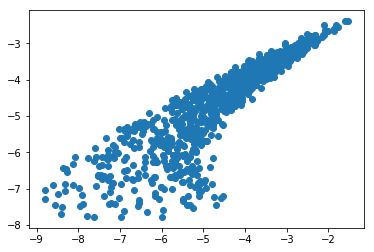

In [29]:
X_train=train.drop(['SUV_diff'],axis=1)
X_test = test.drop(['SUV_diff'],axis=1)
y_train=train['SUV_diff']
y_test=test['SUV_diff']

la=Lasso(alpha=0.1,max_iter=30000)
la.fit(X_train,y_train)
pred11 = la.predict(X_test)
from sklearn.metrics import r2_score
sc_ore = r2_score(y_test,pred11)
print(sc_ore)

mse1 = mean_squared_error(y_test,pred11)
mae = mean_absolute_error(y_test,pred11)
print('Rsquare value:',sc_ore)
print('mse:',mse1)
print('mae:',mae)
plt.scatter(y_test,pred11)

0.7361769278508987
Rsquare value: 0.7361769278508987
mse: 0.5340633705732317
mae: 0.5565668135185616


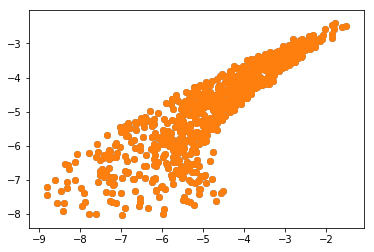

In [38]:
from sklearn.linear_model import Ridge
X_train=train.drop(['SUV_diff'],axis=1)
X_test = test.drop(['SUV_diff'],axis=1)
y_train=train['SUV_diff']
y_test=test['SUV_diff']

la=Ridge(alpha=10,max_iter=10000)
la.fit(X_train,y_train)
pred12 = la.predict(X_test)
from sklearn.metrics import r2_score
sc_ore = r2_score(y_test,pred12)
print(sc_ore)

mse1 = mean_squared_error(y_test,pred12)
mae = mean_absolute_error(y_test,pred12)
print('Rsquare value:',sc_ore)
print('mse:',mse1)
print('mae:',mae)
plt.scatter(y_test,pred12)
plt.scatter(y_test,pred12)


Rsquare value: 0.7415639009125738
mse: 3.635721667922858
mae: 1.3726085733471736


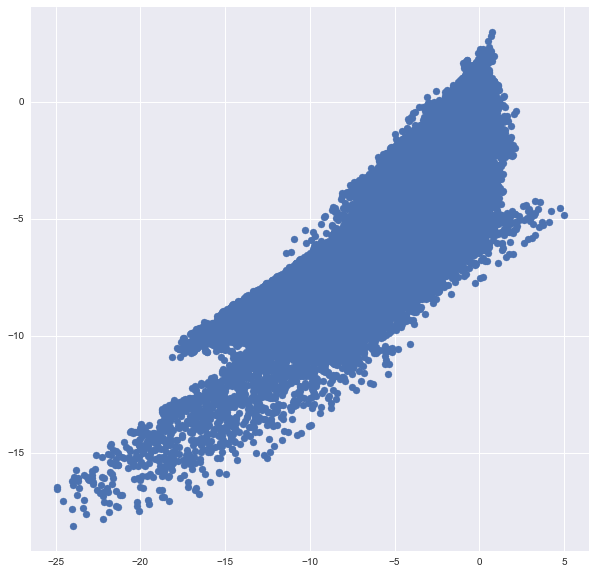

In [84]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,)
ln = LinearRegression()
ln.fit(X_train,y_train)
pred = ln.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
sc_ore = r2_score(y_test,pred)
mse1 = mean_squared_error(y_test,pred)
mae = mean_absolute_error(y_test,pred)
print('Rsquare value:',sc_ore)
print('mse:',mse1)
print('mae:',mae)
plt.scatter(y_test,pred)


In [ ]:
svr_poly = SVR(kernel='poly',C=1000,degree=2)
svr_rbf = SVR(kernel='rbf',C=1000,gamma=0.1)
svr_poly.fit(X_train5,y_train5)
svr_rbf.fit(X_train5,y_train5)
plt.scatter(X_train5,y_train5,color='black',label='Data')
plt.plot(X_train5,svr_lin.predict(y_train5),color='red',label='linear')
plt.plot(X_train5,svr_poly.predict(y_train5),color='green',label='poly')
plt.plot(X_train5,svr_rbf.predict(y_train5),color='blue',label='rbf')
plt.xlabel('features')
plt.ylabel('suvdiff')
plt.show()

In [ ]:
X5 = df1.drop(labels=['SUV_diff','MidPETsparse','percentage_suvdiff'],axis=1)
y5=df1['percentage_suvdiff']
from sklearn.model_selection import train_test_split
X_train5,X_test5,y_train5,y_test5=train_test_split(X5,y5,test_size=0.20)

from sklearn.svm import SVR
svr_lin = SVR(kernel='linear',C=1000)

svr_lin.fit(X_train5,y_train5)

pred5 = svr_lin.predict(X_test5)
from sklearn.metrics import r2_score
sc_ore1 = r2_score(y_test5,pred5)
print(sc_ore1)
plt.scatter(y_test5,pred5)


0.8167203960095804


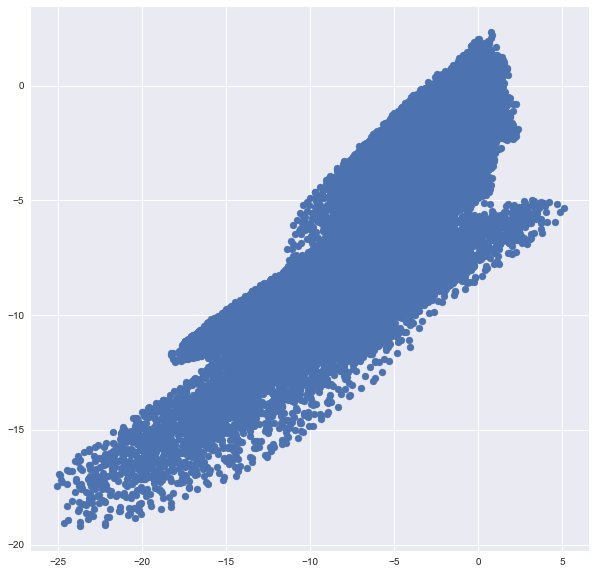

In [111]:

X1 = df1.drop(labels=['SUV_diff','MidPETsparse','percentage_suvdiff'],axis=1)
y1=df1['SUV_diff']
from sklearn.preprocessing import RobustScaler
std = RobustScaler()
X11=std.fit_transform(X1)
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1=train_test_split(X11,y1,test_size=0.50,)
ln = LinearRegression()
ln.fit(X_train1,y_train1)
pred1 = ln.predict(X_test1)
from sklearn.metrics import r2_score
sc_ore1 = r2_score(y_test1,pred1)
print(sc_ore1)
plt.scatter(y_test1,pred1)

0.5351621331083214


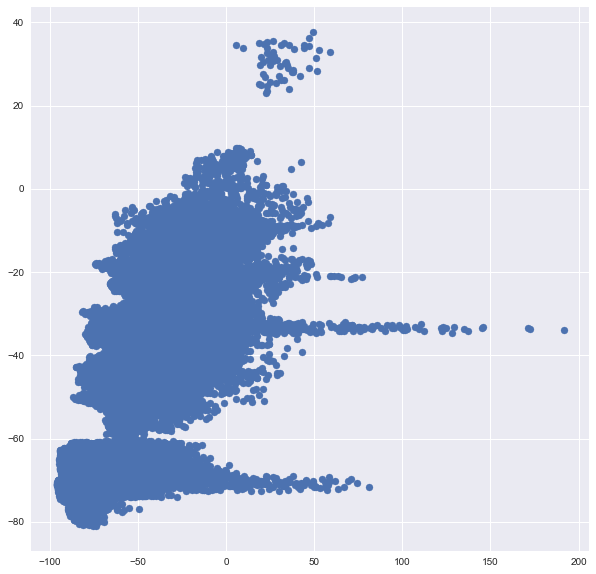

In [71]:
X3 = df1.drop(labels=['SUV_diff','MidPETsparse','percentage_suvdiff'],axis=1)
y3=df1['percentage_suvdiff']
from sklearn.model_selection import train_test_split
X_train3,X_test3,y_train3,y_test3=train_test_split(X3,y3,test_size=0.20,)
ln = LinearRegression()
ln.fit(X_train3,y_train3)
pred3 = ln.predict(X_test3)
from sklearn.metrics import r2_score
sc_ore3 = r2_score(y_test3,pred3)
print(sc_ore3)
plt.scatter(y_test3,pred3)

0.6318672995788133


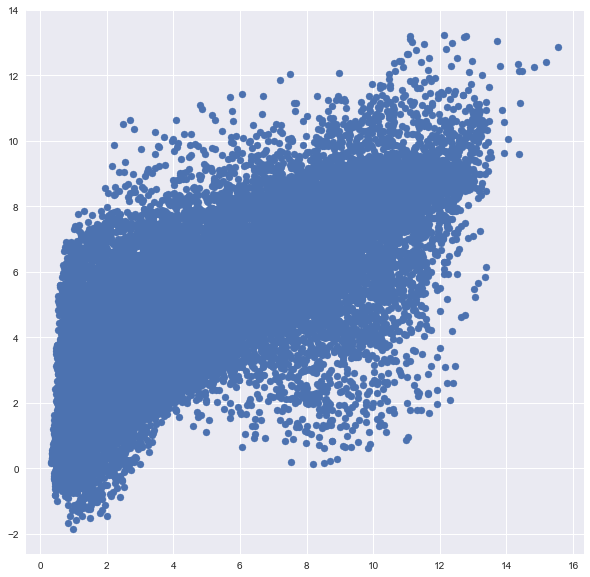

In [69]:
X2 = df1.drop(labels=['SUV_diff','MidPETsparse','percentage_suvdiff'],axis=1)
y2=df1['MidPETsparse']
from sklearn.model_selection import train_test_split
X_train2,X_test2,y_train2,y_test2=train_test_split(X2,y2,test_size=0.20,)
ln = LinearRegression()
ln.fit(X_train2,y_train2)
pred2 = ln.predict(X_test2)
from sklearn.metrics import r2_score
sc_ore2 = r2_score(y_test2,pred2)
print(sc_ore2)
plt.scatter(y_test2,pred2)

0.8040577450144588


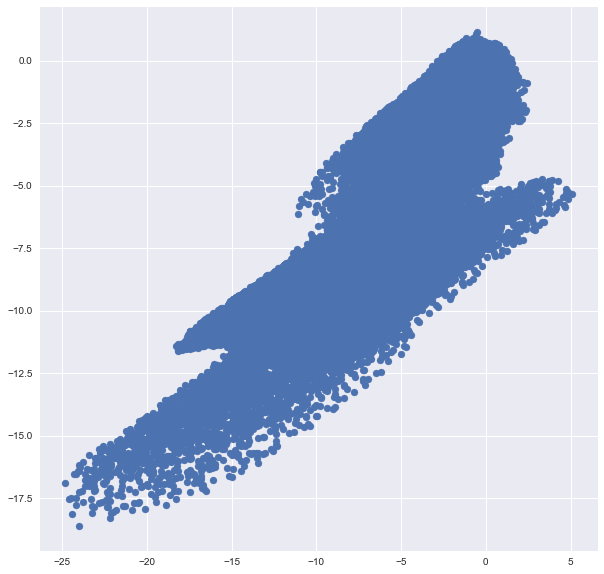

In [99]:
from sklearn.model_selection import train_test_split
X_train11,X_test11,y_train11,y_test11=train_test_split(X1,y1,test_size=0.50,)
la=Lasso(alpha=0.1,max_iter=20000)
la.fit(X_train11,y_train11)
pred11 = la.predict(X_test11)
from sklearn.metrics import r2_score
sc_ore = r2_score(y_test11,pred11)
print(sc_ore)
plt.scatter(y_test11,pred11)

0.708595236783432


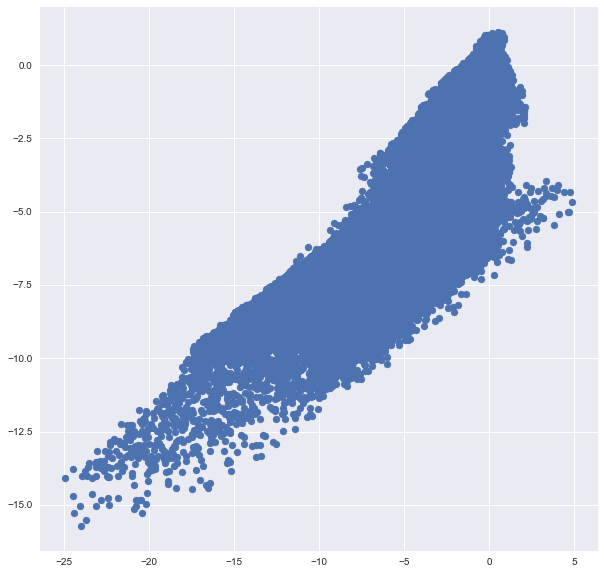

In [78]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,)
la=Lasso(alpha=)
la.fit(X_train,y_train)
pred = la.predict(X_test)
from sklearn.metrics import r2_score
sc_ore = r2_score(y_test,pred)
print(sc_ore)
plt.scatter(y_test,pred)

0.8163360755802056


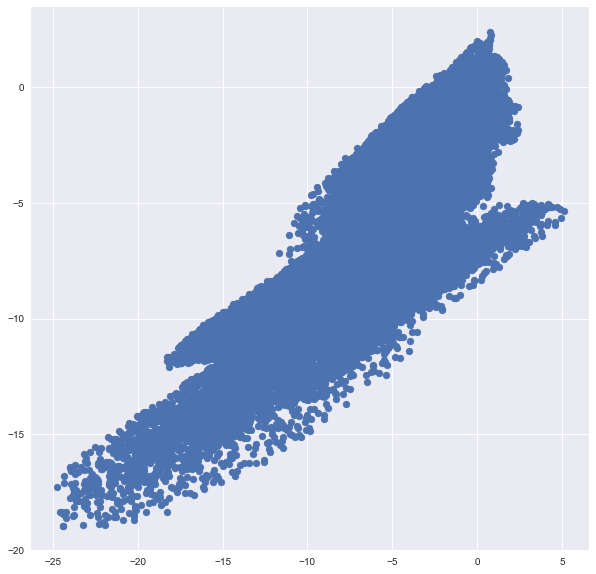

In [105]:
X1 = df1.drop(labels=['SUV_diff','MidPETsparse','percentage_suvdiff'],axis=1)
y1=df1['SUV_diff']
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1=train_test_split(X1,y1,test_size=0.50,)
ln = LinearRegression()
ln.fit(X_train1,y_train1)
pred1 = ln.predict(X_test1)
from sklearn.metrics import r2_score
sc_ore1 = r2_score(y_test1,pred1)
print(sc_ore1)
plt.scatter(y_test1,pred1)

C:\Users\AB Duke\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


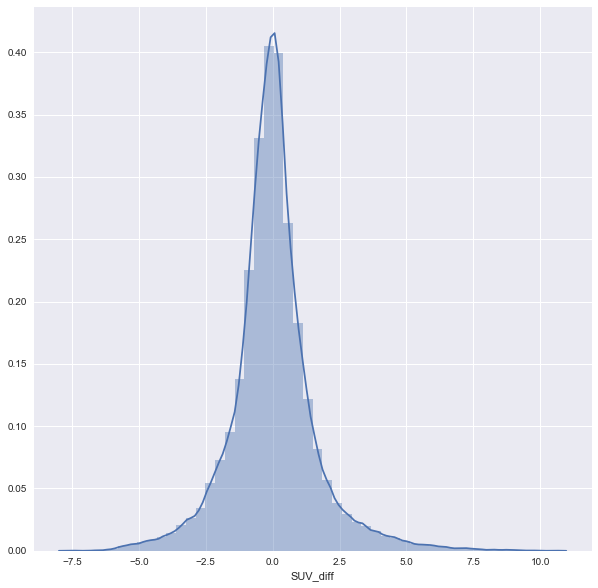

In [76]:
sns.distplot((y_test1-pred1),)

0.8177134746446156


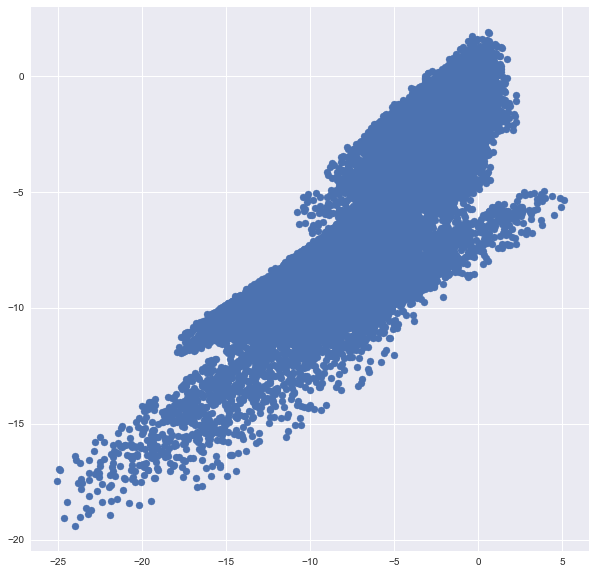

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
X_train12,X_test12,y_train12,y_test12=train_test_split(X1,y1,test_size=0.20)
la=Ridge(alpha=1.5,max_iter=10000)
la.fit(X_train12,y_train12)
pred12 = la.predict(X_test12)
from sklearn.metrics import r2_score
sc_ore = r2_score(y_test12,pred12)
print(sc_ore)
plt.scatter(y_test12,pred12)

C:\Users\AB Duke\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


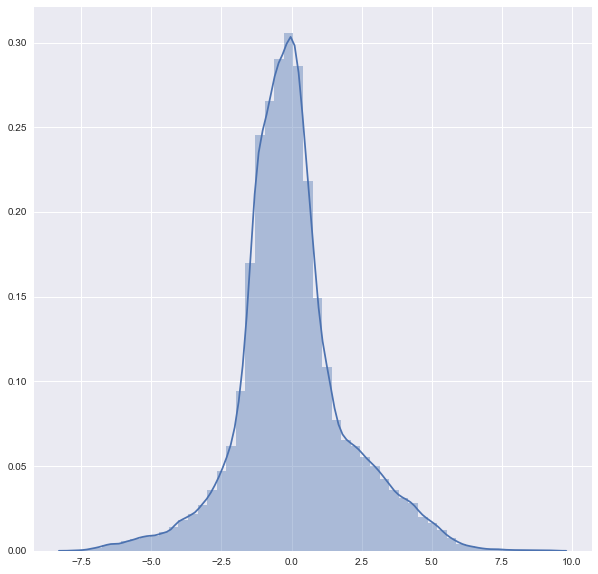

In [74]:
sns.distplot((y_test-pred))

In [43]:
X=pd.DataFrame(data=df1,columns=['PrePETsparse','DoseSparse','pre_pet_mean','pre_pet_max','pre_pet_peak','pre_pet_tlg'])
X.head()

,PrePETsparse,DoseSparse,pre_pet_mean,pre_pet_max,pre_pet_peak,pre_pet_tlg
0,2.280547,24.838322,4.0,7.62,6.71,98.55
1,2.204343,24.722164,4.0,7.62,6.71,98.55
2,2.107694,24.610783,4.0,7.62,6.71,98.55
3,1.953427,24.550318,4.0,7.62,6.71,98.55
4,1.797301,24.594870,4.0,7.62,6.71,98.55


In [44]:
y = pd.DataFrame(df1.SUV_diff)